In [602]:
#importing libraries
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
warnings.filterwarnings("ignore")

In [603]:
#Reading data set
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [604]:
#data cleaning
#check for rows having null column values
day_df.isnull().any(axis=1).sum()

#data looks clean

0

In [605]:
#changing season column for better understanding
day_df['season'] = day_df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [606]:
#deriving year column from dteday column
day_df['year_from_date'] = day_df['dteday'].apply(lambda d: int(d[6:]))
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_from_date
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018


In [607]:
#changing weathersit column for better understanding
#Excellent_weather = Clear, Few clouds, Partly cloudy, Partly cloudy
#Good_weather = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#Bad_weather = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#Extremely_bad_weather = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

day_df['weathersit'] = day_df['weathersit'].map({1:'Excellent_weather',2:'Good_weather',3:'Bad_weather',4:'Extremely_bad_weather'})
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_from_date
0,1,01-01-2018,spring,0,1,0,6,0,Good_weather,14.110847,18.18125,80.5833,10.749882,331,654,985,2018
1,2,02-01-2018,spring,0,1,0,0,0,Good_weather,14.902598,17.68695,69.6087,16.652113,131,670,801,2018
2,3,03-01-2018,spring,0,1,0,1,1,Excellent_weather,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018
3,4,04-01-2018,spring,0,1,0,2,1,Excellent_weather,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018
4,5,05-01-2018,spring,0,1,0,3,1,Excellent_weather,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018


In [608]:
#changing mnth column for better understanding
day_df['mnth'] = day_df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'})
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_from_date
0,1,01-01-2018,spring,0,jan,0,6,0,Good_weather,14.110847,18.18125,80.5833,10.749882,331,654,985,2018
1,2,02-01-2018,spring,0,jan,0,0,0,Good_weather,14.902598,17.68695,69.6087,16.652113,131,670,801,2018
2,3,03-01-2018,spring,0,jan,0,1,1,Excellent_weather,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018
3,4,04-01-2018,spring,0,jan,0,2,1,Excellent_weather,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018
4,5,05-01-2018,spring,0,jan,0,3,1,Excellent_weather,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018


In [609]:
#changing workingday column for better understanding
day_df['weekday'] = day_df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thur',5:'fri',6:'sat'})
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_from_date
0,1,01-01-2018,spring,0,jan,0,sat,0,Good_weather,14.110847,18.18125,80.5833,10.749882,331,654,985,2018
1,2,02-01-2018,spring,0,jan,0,sun,0,Good_weather,14.902598,17.68695,69.6087,16.652113,131,670,801,2018
2,3,03-01-2018,spring,0,jan,0,mon,1,Excellent_weather,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018
3,4,04-01-2018,spring,0,jan,0,tue,1,Excellent_weather,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018
4,5,05-01-2018,spring,0,jan,0,wed,1,Excellent_weather,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018


In [610]:
#lets delete some columsn which are not use full for our analysis.
#we have fetched data for dteday, we can delete this column
day_df = day_df.drop('dteday',axis=1)

#instant is just a ID, we dont need this column
day_df = day_df.drop('instant',axis=1)

#we have fetched the year information in seperate column, so yr column is not required.
day_df = day_df.drop('yr',axis=1)

#it looks like registered + casual = cnt, hence we will drop registered & casual columns
day_df = day_df.drop(['casual','registered'],axis=1)

day_df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year_from_date
0,spring,jan,0,sat,0,Good_weather,14.110847,18.18125,80.5833,10.749882,985,2018
1,spring,jan,0,sun,0,Good_weather,14.902598,17.68695,69.6087,16.652113,801,2018
2,spring,jan,0,mon,1,Excellent_weather,8.050924,9.47025,43.7273,16.636703,1349,2018
3,spring,jan,0,tue,1,Excellent_weather,8.200000,10.60610,59.0435,10.739832,1562,2018
4,spring,jan,0,wed,1,Excellent_weather,9.305237,11.46350,43.6957,12.522300,1600,2018


In [611]:
#data analysis
#Lokking at data, we have numeric variables as temp,atemp,hum,windspeed,cnt
#Catagorical variables as season,mnth,holiday,weekday,workingday,weathersit,year_from_date

#our target variable is cnt, lets check the behavior of cnt with all other numeric variables.

<Figure size 2000x2000 with 0 Axes>

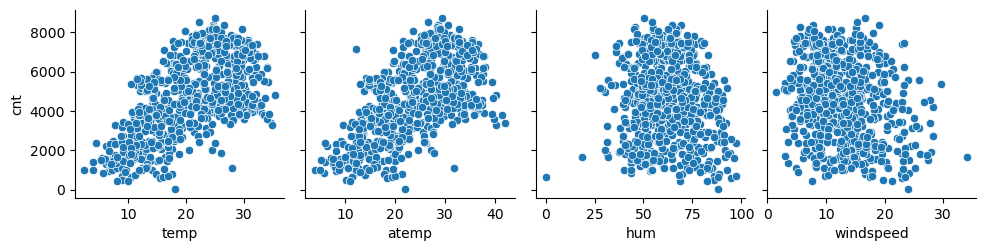

In [612]:
#checking relation of cnt with other numeric variable
plt.figure(figsize=(20,20))

sns.pairplot(day_df,x_vars=['temp','atemp','hum','windspeed'],y_vars=['cnt'])
plt.show()

#there is some linear relation ship exists between temp & atemp.

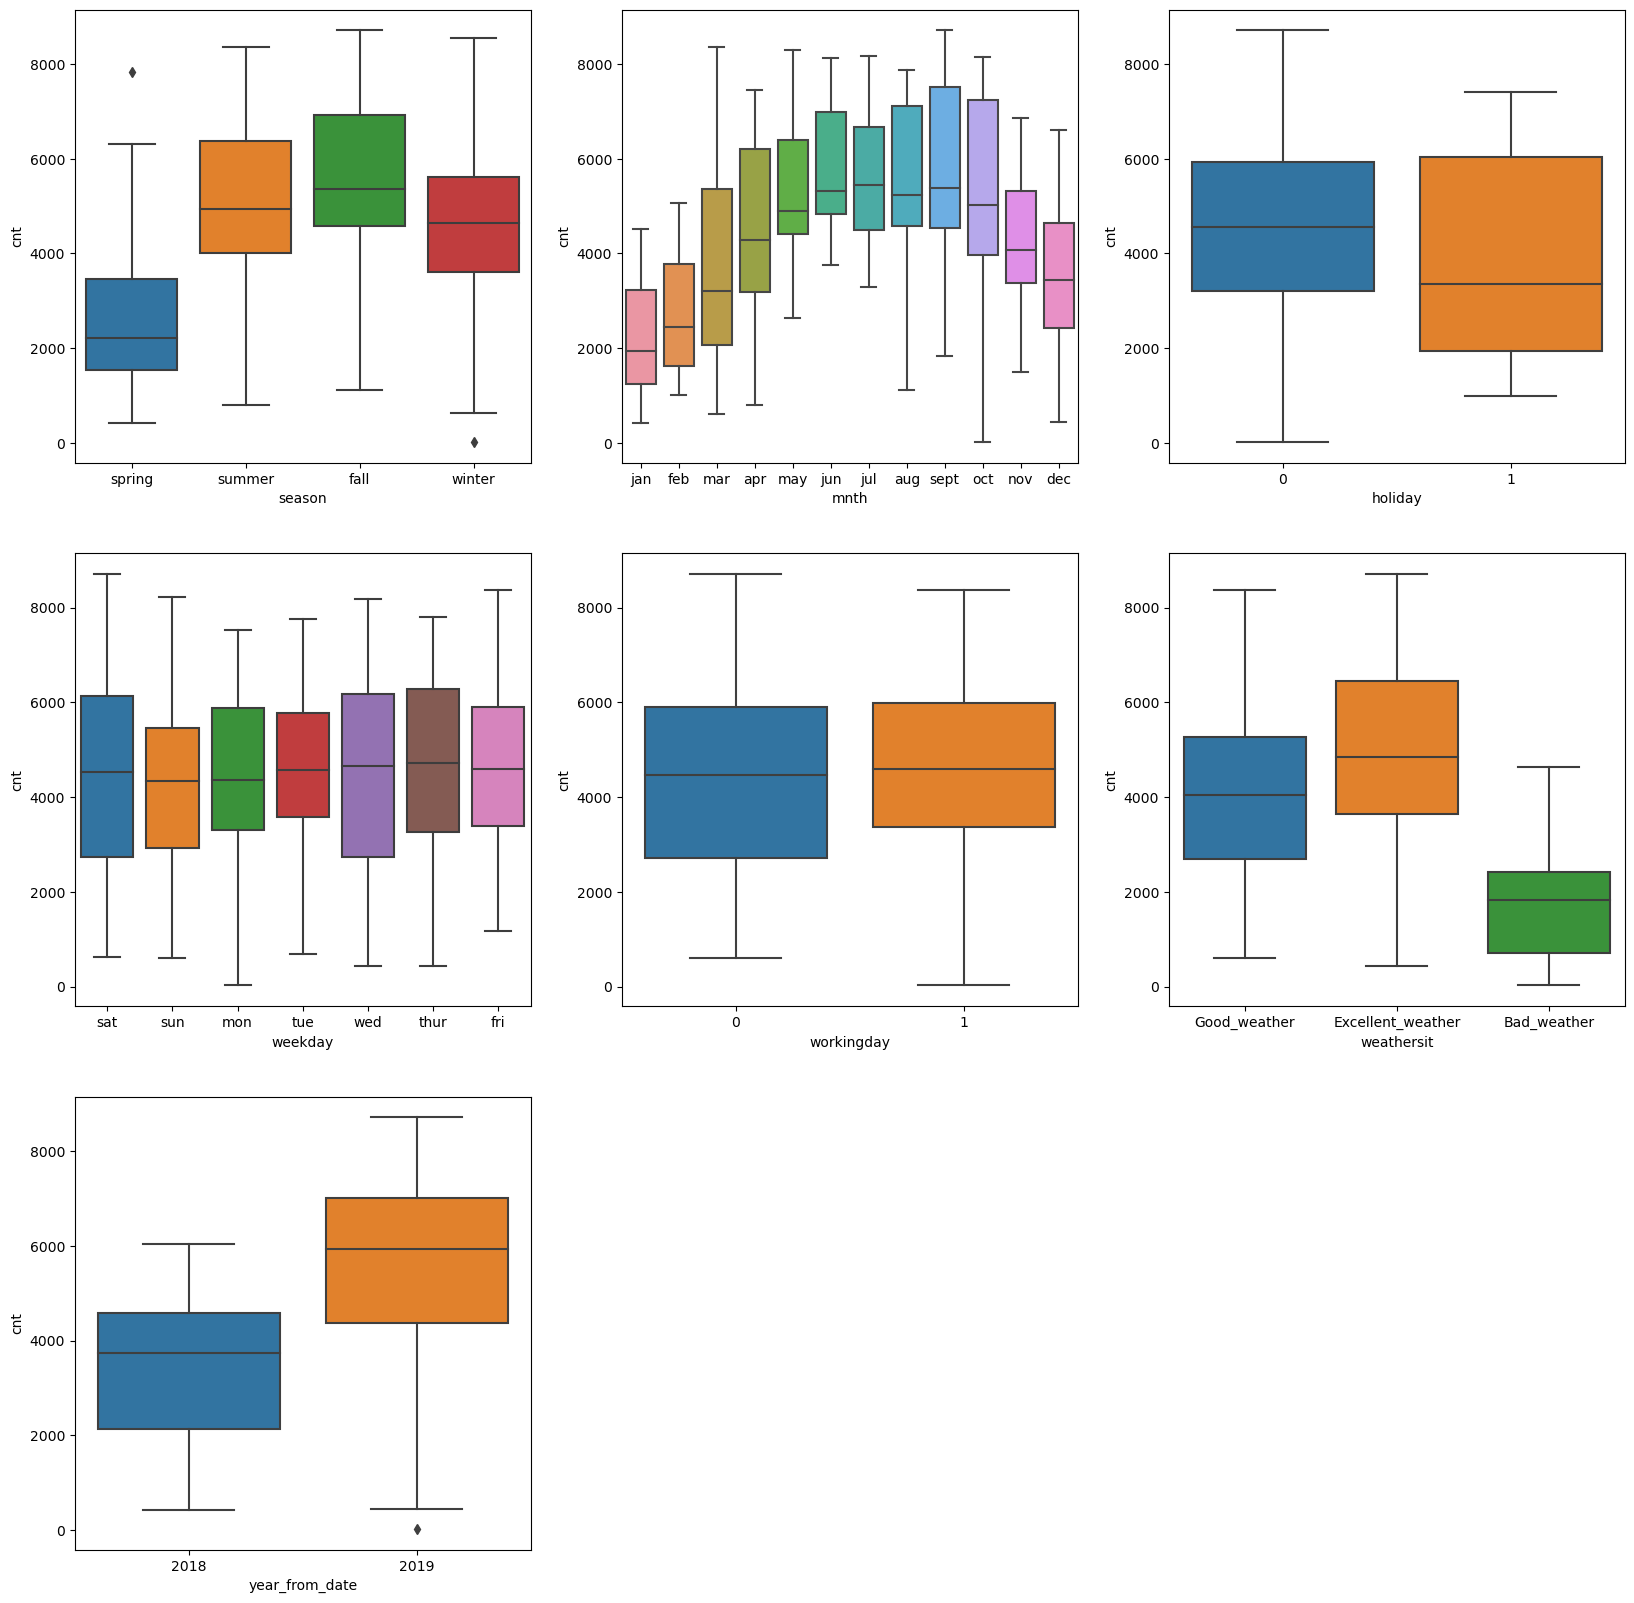

In [613]:
#checking relation of cnt with catagorical variable
plt.figure(figsize=(20,20))

#Catagorical variables as season,mnth,holiday,weekday,workingday,weathersit,year_from_date
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=day_df)

plt.subplot(3,3,2)
sns.boxplot(x='mnth',y='cnt',data=day_df)

plt.subplot(3,3,3)
sns.boxplot(x='holiday',y='cnt',data=day_df)

plt.subplot(3,3,4)
sns.boxplot(x='weekday',y='cnt',data=day_df)

plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt',data=day_df)

plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=day_df)

plt.subplot(3,3,7)
sns.boxplot(x='year_from_date',y='cnt',data=day_df)

plt.show()

#following observations can be made by looking at data
#1. cnt is more in the season of fall compared to spring,summer & winter
#2. cnt is more in 2019 than in 2018 which means demand for rental is increasing gradualy.
#3. cnt will be increased during mid of the years.
#4. cnt is more during workingday than compared to holiday.
#5. cnt does not depend on which day of week.
#6. cnt depends on weather condition, the demand will be decreased as the weather getting worse.

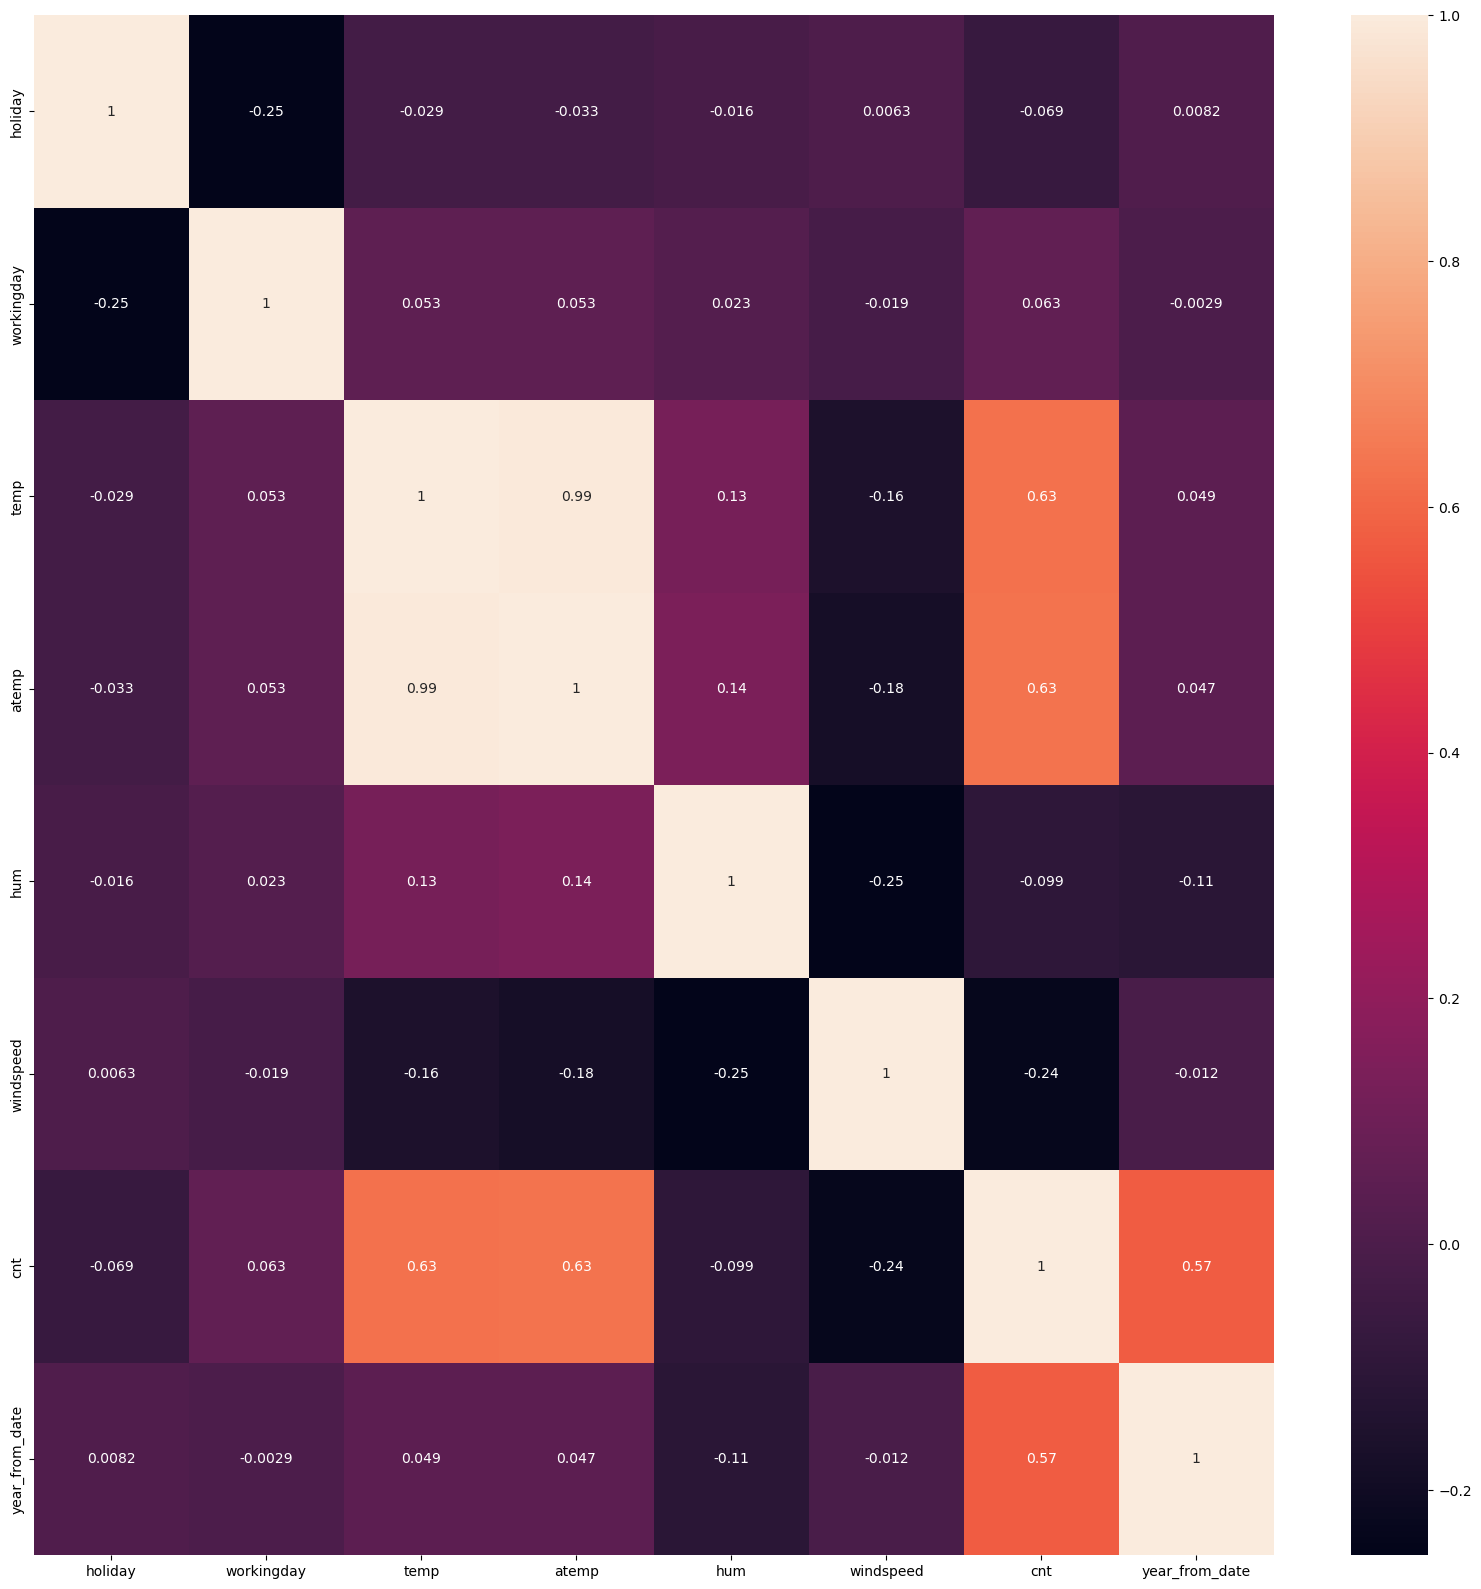

In [614]:
#lets also check the co relation of cnt with other variables using heat maps.
plt.figure(figsize=(20,20))
sns.heatmap(day_df.corr(),annot=True)
plt.show()

#heat map also shows there is a strong relation ship exists between cnt with temp & atemp variables

In [615]:
day_df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year_from_date
0,spring,jan,0,sat,0,Good_weather,14.110847,18.18125,80.5833,10.749882,985,2018
1,spring,jan,0,sun,0,Good_weather,14.902598,17.68695,69.6087,16.652113,801,2018
2,spring,jan,0,mon,1,Excellent_weather,8.050924,9.47025,43.7273,16.636703,1349,2018
3,spring,jan,0,tue,1,Excellent_weather,8.200000,10.60610,59.0435,10.739832,1562,2018
4,spring,jan,0,wed,1,Excellent_weather,9.305237,11.46350,43.6957,12.522300,1600,2018


In [616]:
#creation of dummy variables
season_dummy = pd.get_dummies(day_df['season'],drop_first=True)
day_df = pd.concat([day_df,season_dummy],axis=1)
day_df = day_df.drop('season',axis = 1)

In [617]:
mnth_dummy = pd.get_dummies(day_df['mnth'],drop_first=True)
day_df = pd.concat([day_df,mnth_dummy],axis=1)
day_df = day_df.drop('mnth',axis = 1)

In [618]:
weekday_dummy = pd.get_dummies(day_df['weekday'],drop_first=True)
day_df = pd.concat([day_df,weekday_dummy],axis=1)
day_df = day_df.drop('weekday',axis = 1)

In [619]:
weathersit_dummy = pd.get_dummies(day_df['weathersit'],drop_first=True)
day_df = pd.concat([day_df,weathersit_dummy],axis=1)
day_df = day_df.drop('weathersit',axis = 1)

In [620]:
day_df['year_from_date'] = day_df['year_from_date'].map({2019:1,2018:0})
day_df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,year_from_date,spring,summer,...,oct,sept,mon,sat,sun,thur,tue,wed,Excellent_weather,Good_weather
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [621]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   holiday            730 non-null    int64  
 1   workingday         730 non-null    int64  
 2   temp               730 non-null    float64
 3   atemp              730 non-null    float64
 4   hum                730 non-null    float64
 5   windspeed          730 non-null    float64
 6   cnt                730 non-null    int64  
 7   year_from_date     730 non-null    int64  
 8   spring             730 non-null    uint8  
 9   summer             730 non-null    uint8  
 10  winter             730 non-null    uint8  
 11  aug                730 non-null    uint8  
 12  dec                730 non-null    uint8  
 13  feb                730 non-null    uint8  
 14  jan                730 non-null    uint8  
 15  jul                730 non-null    uint8  
 16  jun                730 non

In [622]:
#we have converted columns that will be used for modeling, lets split out data to train & test sets.
day_df.columns = day_df.columns.astype(str)
day_df_train,day_df_test = train_test_split(day_df,train_size=0.7,random_state=100)

In [623]:
#lets rescale the our data frame to use it for modeling
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt',]
day_df_train[num_vars] = scaler.fit_transform(day_df_train[num_vars])
day_df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,year_from_date,spring,summer,...,oct,sept,mon,sat,sun,thur,tue,wed,Excellent_weather,Good_weather
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,0,...,0,0,0,0,0,0,1,0,1,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,1,0,...,0,0,0,1,0,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,1,0,...,0,0,0,0,1,0,0,0,1,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [624]:
#select variables for model building using RFE
y_train = day_df_train.pop('cnt')
X_train = day_df_train

In [625]:
#using RFE, we will consider only the top 15 variables given by RFE & discard other variables
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [626]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [627]:
#model 1 - considering all variables for model building
lm = sm.OLS(y_train,X_train_rfe_sm)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          2.11e-191
Time:                        23:33:27   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0035      0.038      0.093      0.926      -0.071       0.078
holiday              -0.0674      0.022     -3.012      0.003      -0.111      -0.023
workingday            0.0347      0.011      3.044      0.002       0.012       0.057
temp                  0.5277      0.033     15.884      0.000       0.462       0.593
hum                  -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed            -0.1809      0.025     -7.118      0.000      -0.231      -0.131
year_from_date        0.2298      0.008     28.647      0.000       0.214       0.246
spring               -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer                0.0537      0.015      3.631      0.000       0.025       0.083
winter                0.0992      0.017      5.815      0.000       0.066       0.133
jul                  -0.0546      0.018     -3.019      0.003      -0.090      -0.019
sept                  0.0820      0.017      4.966      0.000       0.050       0.114
sat                   0.0447      0.013      3.422      0.001       0.019       0.070
sun                  -0.0084      0.014     -0.599      0.550      -0.036       0.019
Excellent_weather     0.2450      0.026      9.395      0.000       0.194       0.296
Good_weather          0.1887      0.025      7.641      0.000       0.140       0.237
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.54e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.16e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [628]:
#calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,workingday,94.54
11,sat,22.15
12,sun,21.46
13,Excellent_weather,10.25
14,Good_weather,8.87
6,spring,5.02
0,holiday,4.66
2,temp,3.62
8,winter,3.49
7,summer,2.62


In [629]:
#model 2
#remove sun variable, since it has high p value & high VIF
X_train_rfe = X_train_rfe.drop(['sun'],axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe_sm)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          2.11e-191
Time:                        23:33:29   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0048      0.048     -0.100      0.920      -0.100       0.090
holiday              -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday            0.0430      0.012      3.725      0.000       0.020       0.066
temp                  0.5277      0.033     15.884      0.000       0.462       0.593
hum                  -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed            -0.1809      0.025     -7.118      0.000      -0.231      -0.131
year_from_date        0.2298      0.008     28.647      0.000       0.214       0.246
spring               -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer                0.0537      0.015      3.631      0.000       0.025       0.083
winter                0.0992      0.017      5.815      0.000       0.066       0.133
jul                  -0.0546      0.018     -3.019      0.003      -0.090      -0.019
sept                  0.0820      0.017      4.966      0.000       0.050       0.114
sat                   0.0530      0.015      3.648      0.000       0.024       0.082
Excellent_weather     0.2450      0.026      9.395      0.000       0.194       0.296
Good_weather          0.1887      0.025      7.641      0.000       0.140       0.237
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [630]:
#calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,25.02
2,temp,21.44
12,Excellent_weather,14.44
13,Good_weather,8.92
6,spring,5.53
1,workingday,5.41
4,windspeed,4.66
8,winter,4.03
7,summer,3.19
5,year_from_date,2.09


In [631]:
#model 3
#remove hum since it has high VIF
X_train_rfe = X_train_rfe.drop(['hum'],axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe_sm)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.28e-188
Time:                        23:33:31   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1320      0.039     -3.393      0.001      -0.208      -0.056
holiday              -0.0567      0.027     -2.069      0.039      -0.111      -0.003
workingday            0.0461      0.012      3.931      0.000       0.023       0.069
temp                  0.4915      0.033     15.027      0.000       0.427       0.556
windspeed            -0.1491      0.025     -6.024      0.000      -0.198      -0.100
year_from_date        0.2337      0.008     28.828      0.000       0.218       0.250
spring               -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer                0.0477      0.015      3.180      0.002       0.018       0.077
winter                0.0846      0.017      4.971      0.000       0.051       0.118
jul                  -0.0496      0.018     -2.702      0.007      -0.086      -0.014
sept                  0.0759      0.017      4.537      0.000       0.043       0.109
sat                   0.0579      0.015      3.924      0.000       0.029       0.087
Excellent_weather     0.2895      0.024     11.880      0.000       0.242       0.337
Good_weather          0.2074      0.025      8.383      0.000       0.159       0.256
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [632]:
#calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
11,Excellent_weather,14.42
2,temp,13.42
12,Good_weather,8.21
1,workingday,5.33
3,windspeed,4.63
5,spring,4.16
6,summer,2.78
7,winter,2.73
4,year_from_date,2.07
10,sat,1.99


In [633]:
#model 3
#remove holiday since it has high p value
X_train_rfe = X_train_rfe.drop(['holiday'],axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe_sm)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          7.12e-189
Time:                        23:33:32   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1391      0.039     -3.578      0.000      -0.215      -0.063
workingday            0.0545      0.011      4.938      0.000       0.033       0.076
temp                  0.4920      0.033     14.991      0.000       0.427       0.556
windspeed            -0.1499      0.025     -6.040      0.000      -0.199      -0.101
year_from_date        0.2339      0.008     28.756      0.000       0.218       0.250
spring               -0.0664      0.021     -3.182      0.002      -0.107      -0.025
summer                0.0481      0.015      3.196      0.001       0.019       0.078
winter                0.0838      0.017      4.910      0.000       0.050       0.117
jul                  -0.0486      0.018     -2.637      0.009      -0.085      -0.012
sept                  0.0740      0.017      4.414      0.000       0.041       0.107
sat                   0.0664      0.014      4.671      0.000       0.038       0.094
Excellent_weather     0.2883      0.024     11.795      0.000       0.240       0.336
Good_weather          0.2067      0.025      8.329      0.000       0.158       0.255
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [634]:
#calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
10,Excellent_weather,14.28
1,temp,13.36
11,Good_weather,8.15
0,workingday,4.72
2,windspeed,4.63
4,spring,4.12
5,summer,2.78
6,winter,2.70
3,year_from_date,2.07
9,sat,1.84


In [635]:
#model 4
#remove jul since it has high p value
X_train_rfe = X_train_rfe.drop(['jul'],axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe_sm)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.42e-188
Time:                        23:33:34   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1487      0.039     -3.819      0.000      -0.225      -0.072
workingday            0.0555      0.011      4.996      0.000       0.034       0.077
temp                  0.4796      0.033     14.678      0.000       0.415       0.544
windspeed            -0.1500      0.025     -6.007      0.000      -0.199      -0.101
year_from_date        0.2344      0.008     28.655      0.000       0.218       0.250
spring               -0.0554      0.021     -2.692      0.007      -0.096      -0.015
summer                0.0626      0.014      4.447      0.000       0.035       0.090
winter                0.0958      0.017      5.788      0.000       0.063       0.128
sept                  0.0873      0.016      5.423      0.000       0.056       0.119
sat                   0.0667      0.014      4.665      0.000       0.039       0.095
Excellent_weather     0.2893      0.025     11.765      0.000       0.241       0.338
Good_weather          0.2089      0.025      8.372      0.000       0.160       0.258
==============================================================================
Omnibus:                       76.073   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.745
Skew:                          -0.765   Prob(JB):                     1.71e-41
Kurtosis:                       5.548   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [636]:
#calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
9,Excellent_weather,14.23
1,temp,12.42
10,Good_weather,8.14
0,workingday,4.72
2,windspeed,4.62
4,spring,3.98
6,winter,2.51
5,summer,2.41
3,year_from_date,2.07
8,sat,1.84


In [637]:
#model 5
#remove spring since it has high p value
X_train_rfe = X_train_rfe.drop(['spring'],axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe_sm)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          3.13e-188
Time:                        23:33:35   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2121      0.031     -6.800      0.000      -0.273      -0.151
workingday            0.0561      0.011      5.024      0.000       0.034       0.078
temp                  0.5499      0.020     27.861      0.000       0.511       0.589
windspeed            -0.1552      0.025     -6.195      0.000      -0.204      -0.106
year_from_date        0.2331      0.008     28.370      0.000       0.217       0.249
summer                0.0886      0.010      8.608      0.000       0.068       0.109
winter                0.1307      0.010     12.600      0.000       0.110       0.151
sept                  0.0974      0.016      6.184      0.000       0.066       0.128
sat                   0.0675      0.014      4.693      0.000       0.039       0.096
Excellent_weather     0.2871      0.025     11.611      0.000       0.239       0.336
Good_weather          0.2071      0.025      8.252      0.000       0.158       0.256
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [638]:
#calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,Excellent_weather,8.20
1,temp,6.86
9,Good_weather,4.85
0,workingday,4.56
2,windspeed,4.14
3,year_from_date,2.06
7,sat,1.81
4,summer,1.58
5,winter,1.45
6,sept,1.20


In [639]:
#model 6
#remove Excellent_weather since it has high VIF
X_train_rfe = X_train_rfe.drop(['Excellent_weather'],axis=1)
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe_sm)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.38e-163
Time:                        23:33:40   Log-Likelihood:                 437.81
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     500   BIC:                            -813.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0786      0.021      3.751      0.000       0.037       0.120
workingday         0.0479      0.013      3.818      0.000       0.023       0.073
temp               0.5514      0.022     24.814      0.000       0.508       0.595
windspeed         -0.1838      0.028     -6.550      0.000      -0.239      -0.129
year_from_date     0.2388      0.009     25.858      0.000       0.221       0.257
summer             0.0886      0.012      7.646      0.000       0.066       0.111
winter             0.1161      0.012     10.019      0.000       0.093       0.139
sept               0.0876      0.018      4.948      0.000       0.053       0.122
sat                0.0591      0.016      3.655      0.000       0.027       0.091
Good_weather      -0.0663      0.010     -6.794      0.000      -0.086      -0.047
==============================================================================
Omnibus:                      136.515   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.216
Skew:                          -1.225   Prob(JB):                     6.35e-99
Kurtosis:                       6.909   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [640]:
#calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,temp,4.76
0,workingday,4.02
2,windspeed,3.40
3,year_from_date,2.01
7,sat,1.68
4,summer,1.57
8,Good_weather,1.50
5,winter,1.38
6,sept,1.20


In [641]:
#R- Squared value is 0.791 which is good.
#F-statistic is 210 which is > 1
#Prob (F-statistic) is 1.38e-163 which is almost 0.
#also the p value of all variables is 0 & VIF of all variables are < 5.
#we can consider model - 6 as final model

In [ ]:
#residual analysis on model - 6
y_train_pred = lm.predict(X_train_rfe_sm)
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Error Term')

#analyis seems to be correct, the error term is pointing towards 0.0, 

In [ ]:
#evaluation of model - 6
#fitting a test set
num_vars = ['temp','atemp','hum','windspeed','cnt',]
day_df_test[num_vars] = scaler.transform(day_df_test[num_vars])
day_df_train.head()

In [ ]:
#evaluating on test set
y_test = day_df_test.pop('cnt')
X_test = day_df_test

In [ ]:
#adding constant for test set
X_test_sm = sm.add_constant(X_test)

In [ ]:
#for test set consider only columns which were used for model building & discard other columns
cols = X_test_sm[X_train_rfe_sm.columns].columns
X_test_sm = X_test_sm[cols]
X_test_sm.columns

In [ ]:
#Finally, prediction from model
y_test_pred = lm.predict(X_test_sm)

#Fetch R2 Square
print('R2 Score for Test Set : ',r2_score(y_true=y_test,y_pred=y_test_pred))
print('R2 Score for Train Set : ',r2_score(y_true=y_train,y_pred=y_train_pred))

In [ ]:
#The R2 Score from Training set & Test Set is matching, Hence Model -6 can be consider for predicting cnt.

In [ ]:
#Final equation for predicting cnt
lm.params

#cnt = 0.078577 + (workingday * 0.047912) + (temp * 0.551390) - (windspeed * 0.183844) + (year_from_date * 0.238817) + (summer * 0.088617) + (winter * 0.116112) + (sept * 0.087581) + (sat * 0.059108) - (Good_weather * 0.066337)

In [ ]:
#Following variables are significant in predicting the rental count
#workingday        -> during working day no. of rental will be increased by 0.047912.
#temp              -> as the temperatue increases, rental will be increased by 0.551390
#windspeed         -> as the wind speed increases, rental count will be decreased by -0.183844
#year_from_date    -> every year the rental count will increase by 0.238817
#summer            -> during summer season, the no. of rental will increase by 0.088617
#winter            -> during winter season, the no. of rental will increase by 0.116112
#sept              -> in the month of september, the no. of rental will increase by 0.087581
#sat               -> during saturday the no. of rental will increase by 0.059108
#Good_weather      -> during good weather condition the number of rental will decrease by -0.066337   